## Project Description
Halo, saya Hansen Kallista dan pada Final Project 3 ini, saya menggunakan kasus sebuah rekam medis yang berkaitan dengan serangan jantung. Menggunakan Heart Failure Clinical Records Dataset dengan besar 299 baris dan 13 kolom. Saya akan mencoba menggunakan Random Forest Classification untuk diterapkan pada kasus ini.

### Melakukan Persiapan Awal dan Import Library yang Diperlukan

In [20]:
# Library untuk melaukan proses data
import pandas as pd
import numpy as np

# Library untuk melakukan visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# Library untuk melakukan Modeling dan Training data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [21]:
# Membuat dataframe untuk menyimpan dataset
df_clinical_rec = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')

df_clinical_rec.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Data Cleaning

In [22]:
df_clinical_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [23]:
# Melakukan pengecekan missing values
df_clinical_rec.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Berdasarkan hasil pengecekan diatas, tidak terdapat missing value. Maka kita bisa melanjutkan ke tahap berikutnya.

### Analisis Fitur Kategori

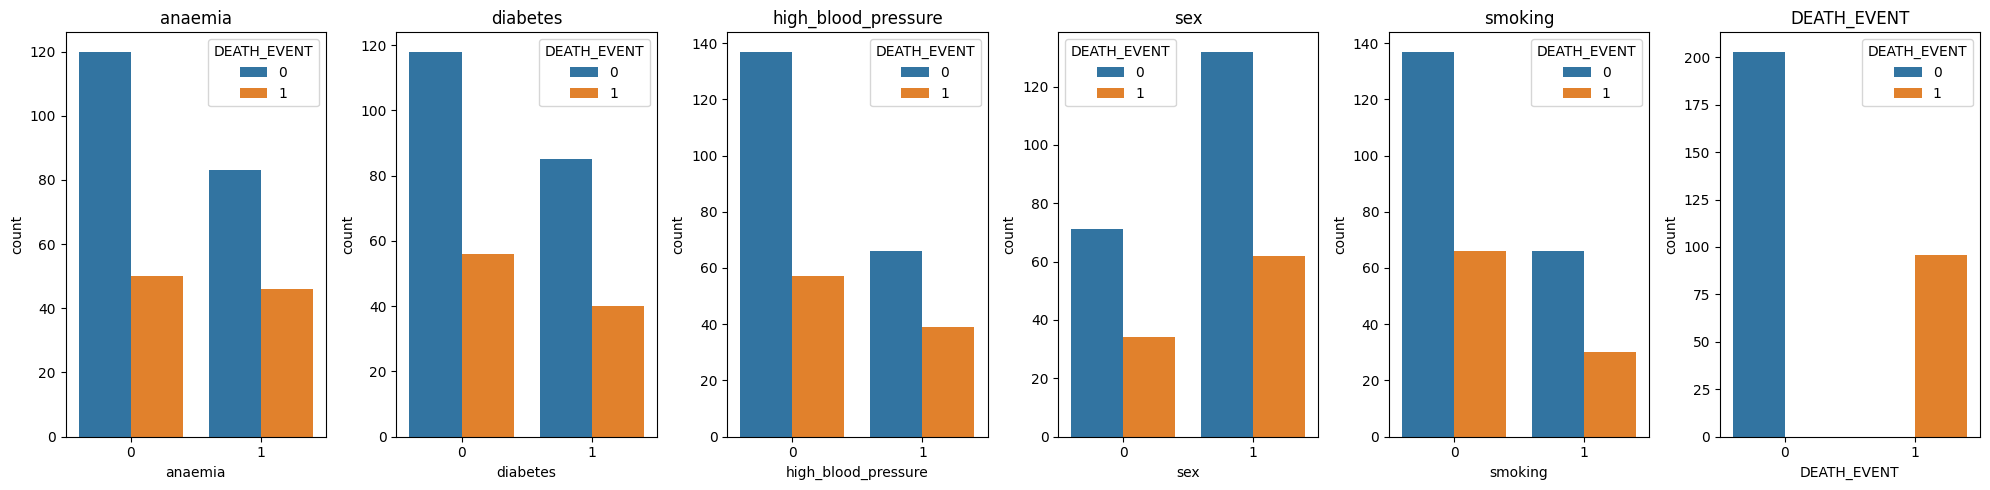

In [24]:
# Membuat Array List untuk menyimpan data
categorical_list=["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]

data_categoric = df_clinical_rec.loc[:, categorical_list]

fig, axs = plt.subplots(ncols=len(categorical_list), figsize=(20,5))

for i, col in enumerate(categorical_list):
    sns.countplot(x=col, data=data_categoric, hue="DEATH_EVENT", ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

### Analisis Fitur Numerik

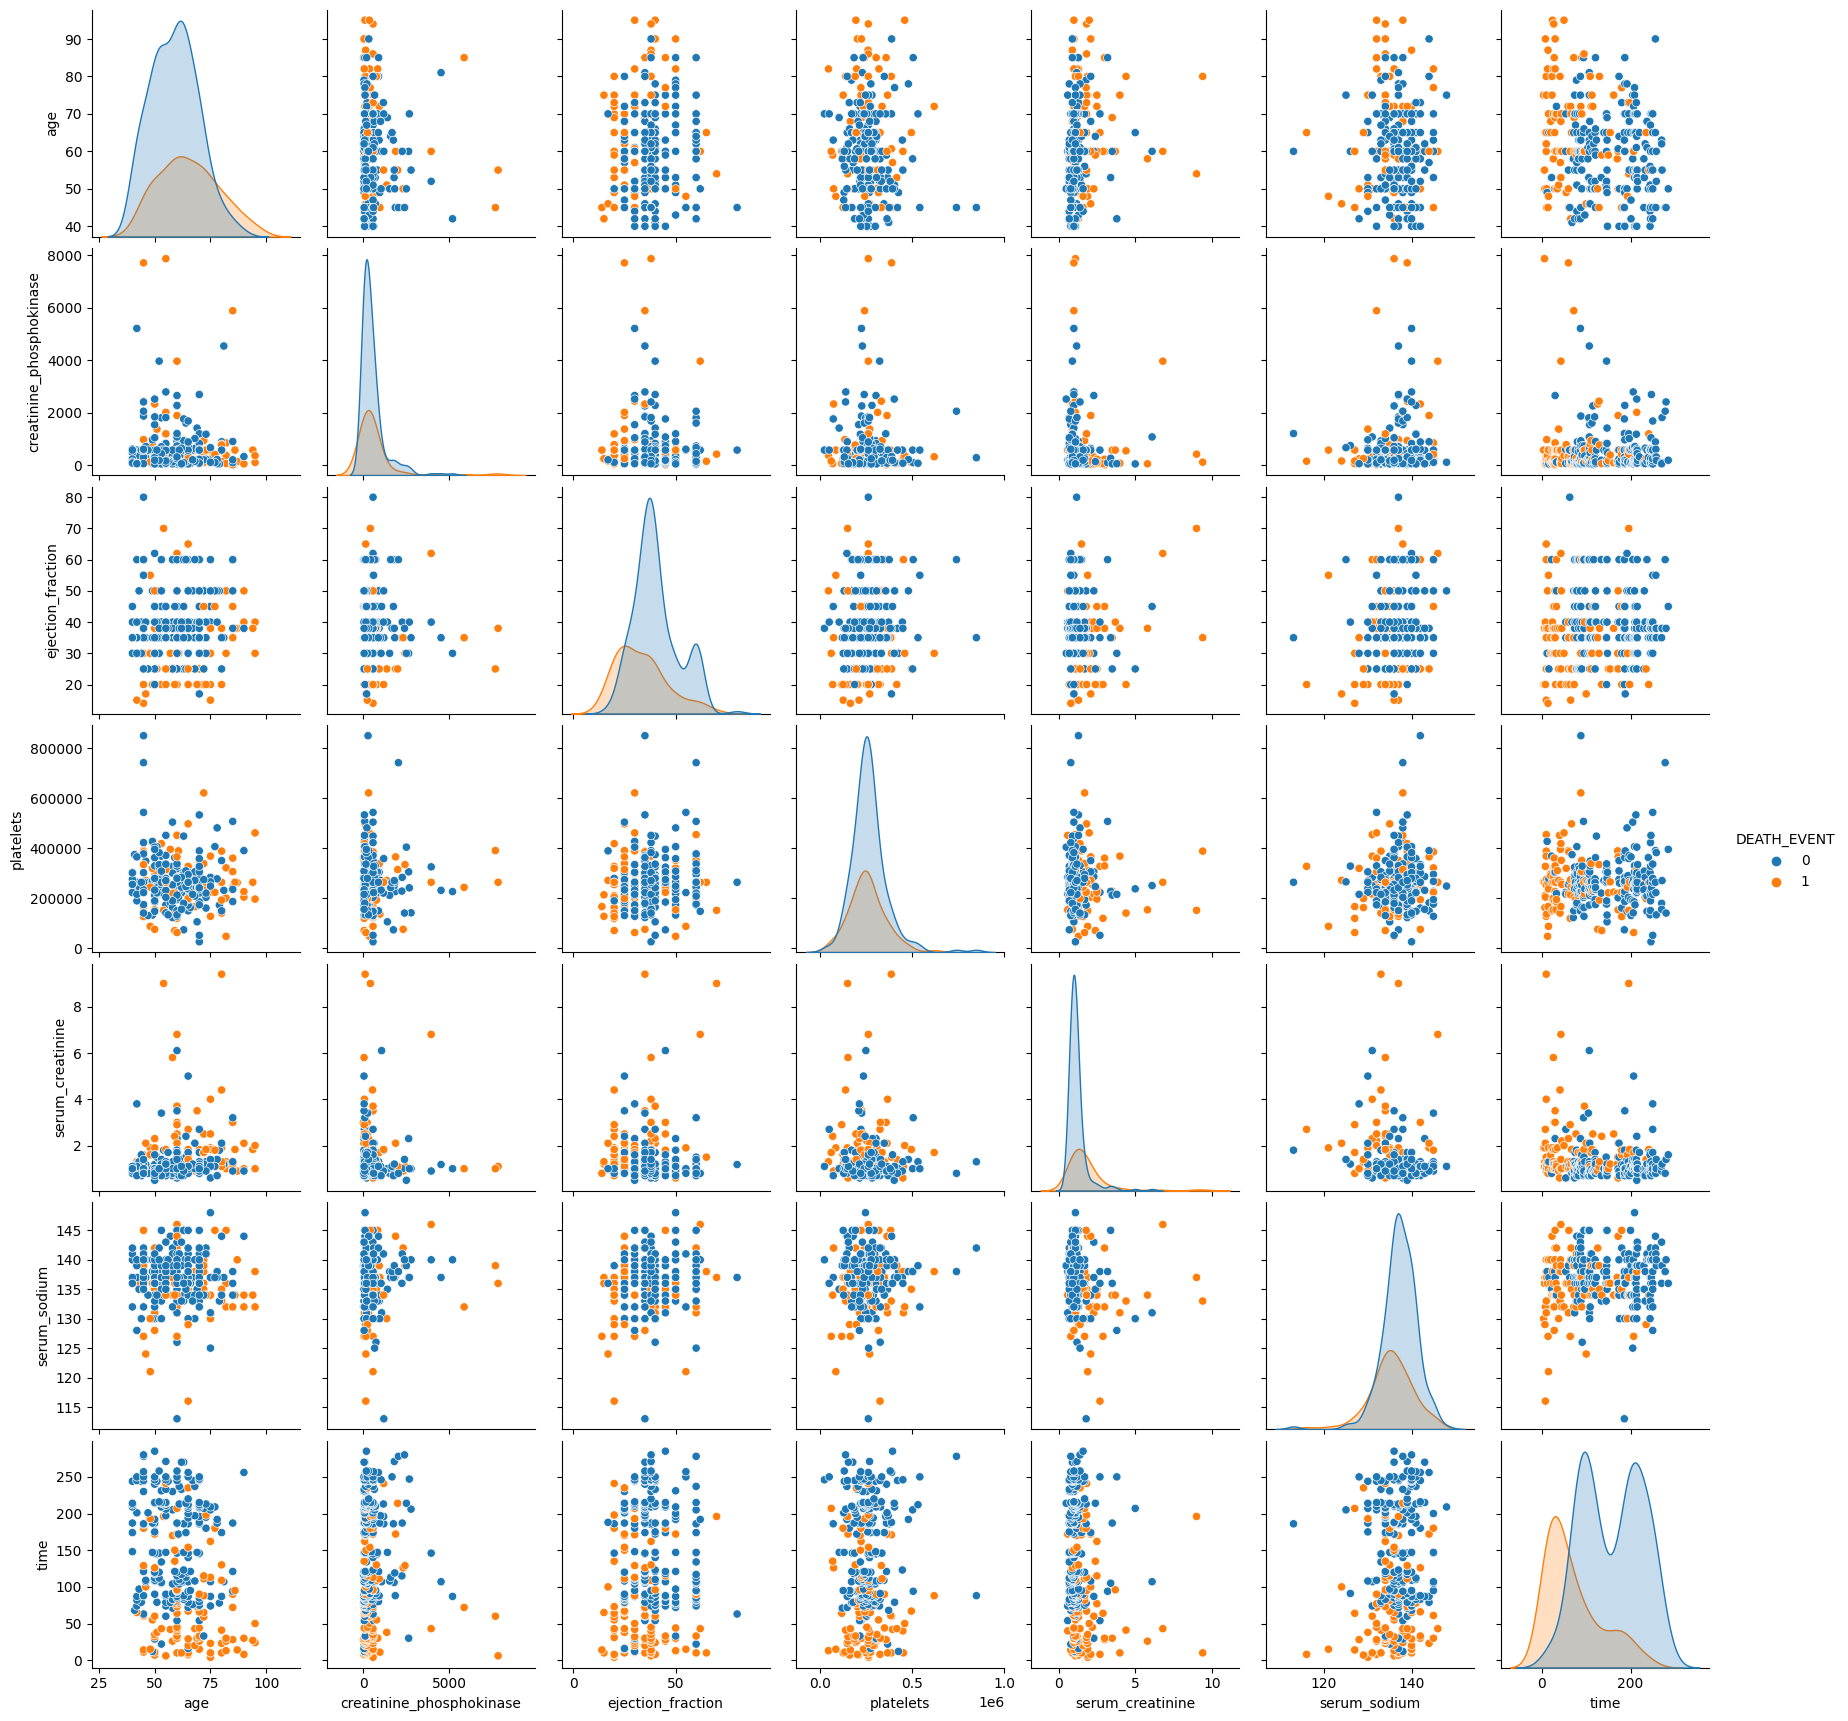

In [25]:
# Membuat Array List yang menyimpan data dari beberapa kolom
numeric_list=["age", "creatinine_phosphokinase",
           "ejection_fraction", "platelets",
           "serum_creatinine", "serum_sodium", "time","DEATH_EVENT"]


data_numeric = df_clinical_rec.loc[:, numeric_list]
sns.pairplot(data_numeric, hue = "DEATH_EVENT", diag_kind = "kde")
plt.show()

## Melakukan Data Pre-processing

In [26]:
# Melakukan encoding categorical columns
df_clinical_test = df_clinical_rec.copy()
df_clinical_test =pd.get_dummies(df_clinical_test, columns= categorical_list[:-1], drop_first=True)

In [27]:
x_data_test = df_clinical_test.drop(["DEATH_EVENT"], axis = 1)
y = df_clinical_test.DEATH_EVENT.values

In [28]:
# Melakukan normalisasi data
x=(x_data_test-np.min(x_data_test))/(np.max(x_data_test)-np.min(x_data_test)).values
x

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000,0.0,0.0,1.0,1.0,0.0
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117,0.0,0.0,0.0,1.0,0.0
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676,0.0,0.0,0.0,1.0,1.0
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676,1.0,0.0,0.0,1.0,0.0
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.004848,0.363636,0.157474,0.067416,0.857143,0.946619,0.0,1.0,1.0,1.0,1.0
295,0.272727,0.229268,0.363636,0.296884,0.078652,0.742857,0.950178,0.0,0.0,0.0,0.0,0.0
296,0.090909,0.259888,0.696970,0.869075,0.033708,0.714286,0.975089,0.0,1.0,0.0,0.0,0.0
297,0.090909,0.304925,0.363636,0.139290,0.101124,0.771429,0.982206,0.0,0.0,0.0,1.0,1.0


In [29]:
# Data Splitting, test dan training
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Random Forest Classification

The optimal value for n_estimator is: 22


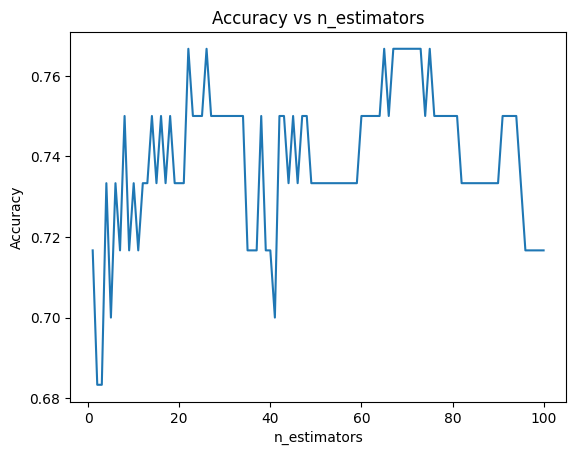

In [34]:
n_estimator_list = list(range(1, 101))
scores_list = []

for n in n_estimator_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    scores_list.append(score)

best_n_estimators=np.argmax(scores_list)+1
print("The optimal value for n_estimator is:", best_n_estimators)

plt.plot(n_estimator_list, scores_list)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_estimators')
plt.show()

In [33]:
rf = RandomForestClassifier(n_estimators=22, random_state=42)
rf.fit(x_train, y_train)
print("Accuracy for Random Forest:",rf.score(x_test,y_test))

Accuracy for Random Forest: 0.7666666666666667


The optimal value for CV: 4


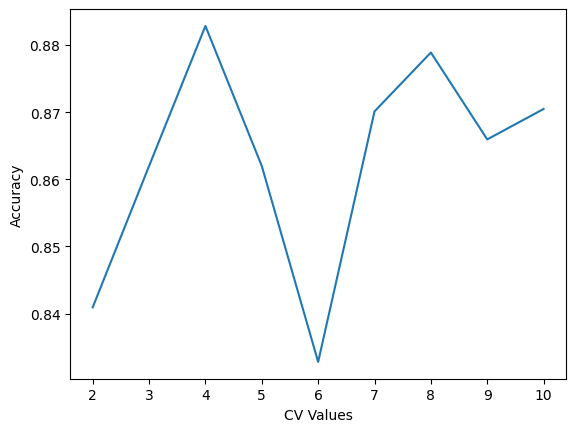

In [37]:
# k Fold Cross-Validation dengan Random Forest
score_list = []
for cv in range(2, 11):
    rf_tuning =RandomForestClassifier(n_estimators=22, random_state=42)
    accuracies = cross_val_score(estimator=rf_tuning, X=x_train,y=y_train, cv=cv)
    mean_accuracy = np.mean(accuracies)
    score_list.append(mean_accuracy)
cv_opt = np.argmax(score_list) + 2
print("The optimal value for CV:", cv_opt)
    
plt.plot(range(2,11),score_list)
plt.xlabel("CV Values")
plt.ylabel("Accuracy")
plt.show()

In [38]:
# Melihat skor akurasi
accuracies = cross_val_score(rf_tuning, X=x_train,y=y_train, cv=4)
accuracies

array([0.86666667, 0.9       , 0.88333333, 0.88135593])

In [39]:
accuracies = cross_val_score(rf_tuning, X=x_train,y=y_train, cv=4)
print("mean_accuracy:", np.mean(accuracies))
print("mean_std:",np.std(accuracies))
rf_tuning.fit(x_train,y_train)
print("Test Accuracy:",rf_tuning.score(x_test,y_test))

mean_accuracy: 0.8828389830508474
mean_std: 0.011816176856084647
Test Accuracy: 0.7666666666666667


In [40]:
def get_cross_validation_accuracy(model, X, y, cv):
    accuracies = cross_val_score(model, X, y, cv=cv)
    return np.mean(accuracies)
    
rf_accuracy = get_cross_validation_accuracy(rf_tuning, x_train, y_train, cv=4)
print("Cross-Validation Accuracy Score:", rf_accuracy)

Cross-Validation Accuracy Score: 0.8828389830508474


## Kesimpulan Akhir
Setelah melakukan pengolahan terhadap dataset rekam medis tersebut, dengan menggunakan Random Forest Classification kita mendatapkan skor tes yang cukup baik yaitu 76.66% dan skor akurasi Cross-Validation hingga 88.28%, maka dari itu penggunaan algoritma Random Forest ini saya kira sudah cocok untuk diterapkan pada dataset rekam medis ini karena Random Forest adalah algoritma yang menggunakan ensemble approach untuk dalam membangun model prediksi. 